In [5]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline 

# Load the dataset
real_estate_data = pd.read_csv("C:/Users/megha.komarraju.UCN/OneDrive - Nice Systems Ltd/Desktop/Personal/Python_Projects/Real_Estate.csv")

# Display the first few rows of the dataset and the info about the dataset
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

The dataset contains 7 columns. Here’s a brief overview of the columns:

* <b>Transaction date</b>: The date of the real estate transaction.
* <b>House age</b>: Age of the house in years.
* <b>Distance to the nearest MRT station</b>: Distance to the nearest Mass Rapid Transit station in meters.
* <b>Number of convenience stores</b>: Number of convenience stores in the vicinity.
* <b>Latitude</b>: Latitude of the property location.
* <b>Longitude</b>: Longitude of the property location.
* <b>House price of unit area</b>: House price of unit area.

In [2]:
# Produce the data profiling report
original_report = ProfileReport(real_estate_data, title='Original Data')
original_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## DISTRUBUTION ANALYSIS
The histograms from above offer insights into the distribution patterns of each variable:

* House Age: The distribution appears relatively even, with a slight uptick in newer properties (lower ages).

* Distance to the Nearest MRT Station: Most properties are situated near an MRT station, as evidenced by the high frequency of shorter distances. However, there is a long tail indicating some properties are located farther away from MRT stations.

* Number of Convenience Stores: The distribution spans a wide range, with noticeable peaks at specific counts such as 0, 5, and 10. This suggests certain common configurations regarding the availability of convenience stores in the vicinity.

* Latitude and Longitude: Both distributions show a degree of concentration, indicating that the properties are clustered within a geographically limited area.

* House Price of Unit Area: The distribution is skewed to the right, with a concentration of properties in the lower price range and a decrease in frequency as prices rise.

## RELATIONSHIP ANALYSIS
The scatter plots from above uncovered intriguing associations between various factors and house prices:

* House Age vs. House Price: No prominent linear correlation is evident between house age and price. Nonetheless, it appears that both very new and very old houses may command higher prices.

* Distance to the Nearest MRT Station vs. House Price: A discernible trend emerges indicating that as the distance to the nearest MRT station increases, house prices tend to decline. This implies a robust negative correlation between these two variables.

* Number of Convenience Stores vs. House Price: A positive correlation seems apparent between the number of convenience stores and house prices. Properties with a greater abundance of nearby convenience stores tend to fetch higher prices.

* Latitude vs. House Price: Although lacking a strong linear relationship, a discernible pattern emerges where specific latitudes correspond to either higher or lower house prices. This observation might suggest certain neighborhoods are perceived as more desirable.

## CORRELATION ANALYSIS

The correlation matrix offers quantified insights into the relationships among variables, particularly regarding house prices:

* House Age: Exhibits a very weak negative correlation with house price (-0.012), indicating that age has minimal predictive power for price in this dataset.

* Distance to Nearest MRT Station: Demonstrates a strong negative correlation with house price (-0.637). This suggests that properties closer to MRT stations tend to command higher prices, signifying a crucial factor in property valuation.

* Number of Convenience Stores: Shows a moderate positive correlation with house price (0.281). A higher presence of convenience stores in the vicinity appears to have a positive impact on property prices.

* Latitude and Longitude: Both exhibit weak correlations with house prices. Latitude displays a slight positive correlation (0.081), whereas longitude shows a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

Now, let’s build a regression model to predict the real estate prices by using the Linear Regression algorithm:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

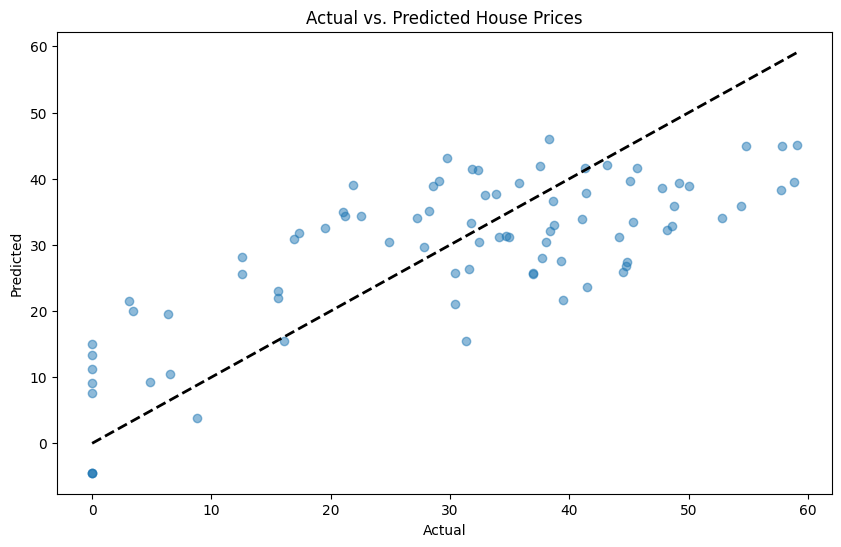

In [13]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [15]:

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {r2}')

Mean Squared Error: 123.41583069419231
R-squared: 0.5538790709925424


# FEATURE ENGINEERING
Adding a new feature by multiplying 'Distance to the nearest MRT station' by 'Number of convenience stores' to capture the interaction effect between these two features


In [16]:
# Create a new feature by multiplying 'Distance to the nearest MRT station' and 'Number of convenience stores'
real_estate_data['MRT_store_interaction'] = real_estate_data['Distance to the nearest MRT station'] * real_estate_data['Number of convenience stores']

# Display the first few rows of the dataset to verify the new feature
print(real_estate_data.head())

             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  MRT_store_interaction  
0                  6.488673             32656.1200  
1                 24.970725               548.0288  
2    

In [24]:
from sklearn import preprocessing
# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'MRT_store_interaction']
target = 'House price of unit area'

X = real_estate_data[features]
X=  preprocessing.scale(X) 
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

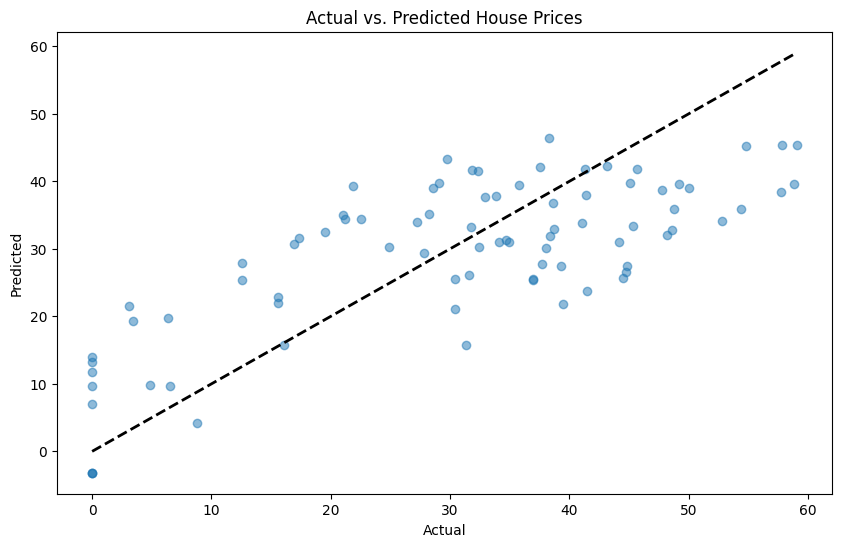

In [25]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [26]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {r2}')

Mean Squared Error: 122.39884764831275
R-squared: 0.5575552397519361


IMPLEMENTING RANDOM FOREST REGRESSOR ENSEMBLE METHOD TO IMPROVE ACCURACY:

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2=   r2_score(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Negative Mean Squared Error: -128.5896974272433
Mean Squared Error on Test Set: 134.37321820576588


In [33]:
r2=   r2_score(y_test, y_pred)
print(r2)

0.5142705388564139
